## K-NN(K-Nearest Neighbors) with iris dataset

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import datasets
import pandas as pd
import numpy as np

In [3]:
iris = datasets.load_iris()

### Dataset description
- sklearn dataset has itself data type like python dict

In [4]:
print(type(iris))

<class 'sklearn.utils.Bunch'>


- Dimension: 150 rows, 4 columns
- features_key: data, target_key: target

### Iris Dataset Description
- There are four attribute with numeric values.
- This is a classification task: target variable has 3 classes.

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Iris Dataset structure

In [6]:
print("Keys: " ,iris.keys())
print("Shape: ",iris.data.shape)

Keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape:  (150, 4)


#### Iris field mapping and first 5 records
- enumerate function would return index and value

In [7]:
iris_index_to_class = {i:c for i,c in enumerate(iris.feature_names)}
print(iris_index_to_class)
iris.data[0:5]

{0: 'sepal length (cm)', 1: 'sepal width (cm)', 2: 'petal length (cm)', 3: 'petal width (cm)'}


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Category mapping
- 0: setosa
- 1: versicolor
- 2: virginica

In [8]:
# Show all categories
print(iris.target_names)
# use np.unique method to show all categories
np.unique(iris.target)

['setosa' 'versicolor' 'virginica']


array([0, 1, 2])

- iris_data: predictive data
- iris_target: labeled data

In [9]:
iris_data = iris.data
iris_target = iris.target

### Hold-out set for final evaluation/validation

In [10]:
train_data, test_data, train_target, test_target = train_test_split(
    iris_data, iris_target, test_size = 0.4, random_state=0
)

In [11]:
train_data.shape

(90, 4)

### Data Splitting for model selection/evaluation
- 8 : 2 = training set : testing set
- By convention, the ratio 7:3 and 8:2 both are frequently used for splitting.

In [12]:
print("Length of train_data", len(train_data))
print("Length of test_data", len(test_data))

Length of train_data 90
Length of test_data 60


In [13]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(train_data, train_target)

KNeighborsClassifier(n_neighbors=6)

In [14]:
iris_test_prediction = knn.predict(test_data)
print(iris_test_prediction)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2]


### Performance : accuracy, macro & micro averages
- accuracy is the the number of correct predictions / the number of test data
- Because of multi-classes in the target, we also use micro and macro averaging to est
    - Acc, micro avg and macro avg are all very close. That means all our target classes' distribution are balanced in our
    dataset. So we can just use accuracy to estimate our model performance.
- In this case, there might be high possibility about over-fitting, because our sample is too small and testing set is
similar to training set.

In [15]:
iris_acc_training_set = knn.score(train_data, train_target)
iris_acc = knn.score(test_data, test_target)
iris_macro_avg = recall_score(test_target, iris_test_prediction, average='macro')
iris_micro_avg = recall_score(test_target, iris_test_prediction, average='micro')
print('knn accuracy of iris training dataset:', iris_acc)
print('knn accuracy with iris dataset:       ', iris_acc)
print('knn macro average with iris dataset:  ', iris_macro_avg)
print('knn micro average with iris dataset:  ', iris_micro_avg)

knn accuracy of iris training dataset: 0.9166666666666666
knn accuracy with iris dataset:        0.9166666666666666
knn macro average with iris dataset:   0.9220151828847482
knn micro average with iris dataset:   0.9166666666666666


### sklearn.metric.classification_report
- This module let us show all classification task metrics we need.
    - precision, recall, f1, accuracy, micro avg, macro avg ... This is a easy way to achieve these all metrics in one
    statement.
    - In this case there is no micro avg. It is removed automatically because it is equal to accuracy.

In [16]:
# labels order must be mapped the target names
print(classification_report(test_target, iris_test_prediction,target_names= iris.target_names, labels=[0,1,2]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.85      0.96      0.90        23
   virginica       0.94      0.81      0.87        21

    accuracy                           0.92        60
   macro avg       0.93      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [17]:
n_neighbor = [6, 10, 15, 20, 30, 50, 70, 90]
r_performance = []
for n in n_neighbor:
    knn_forSelect =KNeighborsClassifier(n_neighbors=n)
    knn_forSelect.fit(train_data, train_target)
    acc_train = knn_forSelect.score(train_data, train_target)
    acc_test = knn_forSelect.score(test_data, test_target)
    r_performance.append([n, format(acc_train,".2f"),
    format(acc_test,".2f")])

### Show the relationship of over-fitting/under-fitting and n_neighbors
We can intuitively get some insights about over/under-fitting from the table below.
- n >= 90 is under-fitting, the model ability is too weak to fit the data.
- n > 6 is over-fitting, the generation of model is bad for test/unseen data.

In [18]:
columns = ['# of neighbors','acc_train','acc_test']
pd.DataFrame(r_performance, columns=columns)

,# of neighbors,acc_train,acc_test
0,6,1.00,0.92
1,10,0.99,0.97
2,15,0.97,0.93
3,20,0.98,0.92
4,30,0.93,0.87
5,50,0.92,0.85
6,70,0.82,0.73
7,90,0.38,0.27


In [19]:
from sklearn.model_selection import GridSearchCV

### Grid Searching for hyper-parameter tuning
- sklearn.model.selection.GridSearchCV
    - This function is included that both cross-validation and grid-searching.
    - We want to use the grid searching to tune our hyper-parameters of model. In this case, we already have chosen knn
    model. There is just one model we use. Therefore, we do not set the cv parameter of this function by default.

In [20]:
iris_estimator = KNeighborsClassifier()
iris_model_para = {'n_neighbors': np.arange(1, 72)}
iris_grid = GridSearchCV(iris_estimator, param_grid=iris_model_para)
iris_grid.fit(train_data, train_target)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71])})

#### Show the grid-searching results
- Best # of neighbor is 4
- And 4 neighbors of knn model get a good score .98

In [21]:
print('Best hyper-parameter for # of neighbor for knn : ', iris_grid.best_params_)
print('Best cv score based on the best para : ', iris_grid.best_score_)

Best hyper-parameter for # of neighbor for knn :  {'n_neighbors': 4}
Best cv score based on the best para :  0.9888888888888889


In [22]:
iris_grid.score(test_data, test_target)

0.9

In [23]:
MINST_dataset = datasets.load_digits()
print('MINST dataset: ', MINST_dataset.keys())

MINST dataset:  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


## MINST dataset description

In [24]:
print(MINST_dataset.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Pre-processing for images
- There are two representations of images data
    - Two dimensional representation: It's easier to understand and be used to visualization.
    - One dimensional representation: It's suitable for training or learning. I think one dimension is more efficient
    for algorithm because you do not need many layers in nested structure.

#### 2 dimensional representation of image

In [25]:
print(MINST_dataset.images.shape)
MINST_dataset.images[0]

(1797, 8, 8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

#### 1 dimensional representation of image transformed from 2D
- Length: 8 * 8 = 64

In [26]:
print(MINST_dataset.data.shape)
MINST_dataset.data[0]

(1797, 64)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### Using matplotlib.plot.imgshow() to translate  a array to a image

0


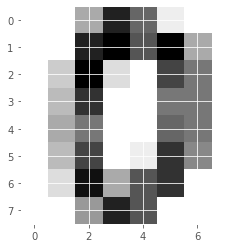

In [27]:
plt.style.use('ggplot')
print(MINST_dataset.target[0])
plt.imshow(MINST_dataset.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

1


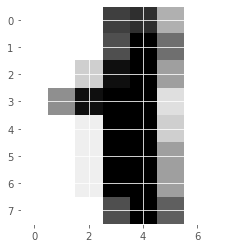

In [28]:
print(MINST_dataset.target[1])
plt.imshow(MINST_dataset.images[1], cmap=plt.cm.gray_r, interpolation='nearest')

2


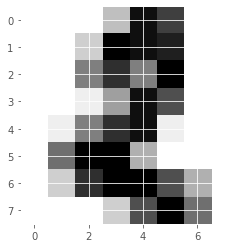

In [29]:
print(MINST_dataset.target[2])
plt.imshow(MINST_dataset.images[2], cmap=plt.cm.gray_r, interpolation='nearest')

In [30]:
plt.close()

- X: predictive variable
- y: labed data(our target)

In [31]:
X = MINST_dataset.data
y = MINST_dataset.target

#### Hold-out set for evaluation of model

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Grid-searching for tuning hyper-parameter of model

In [33]:
MINST_knn_estimator = KNeighborsClassifier()

In [34]:
MINST_model_para = {'n_neighbors': np.arange(1, 100)}
MINST_knn_grid = GridSearchCV(MINST_knn_estimator, MINST_model_para)
MINST_knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [35]:
print(MINST_knn_grid.best_params_)
print(MINST_knn_grid.best_score_)

{'n_neighbors': 3}
0.9867716802168023


In [36]:
MINST_knn_model = KNeighborsClassifier(n_neighbors=3)
MINST_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
MINST_predictions = MINST_knn_model.predict(X_test)
MINST_true = y_test
print(MINST_predictions.shape)
print(MINST_true.shape)

(360,)
(360,)


In [38]:
MINST_macro_avg = recall_score(MINST_true, MINST_predictions, average='macro')
MINST_micro_avg = recall_score(MINST_true, MINST_predictions, average='micro')
print('accuracy: ',MINST_knn_model.score(X_test, y_test))
print('MacroAvg: ',MINST_macro_avg)
print('MicroAvg: ',MINST_micro_avg)
print(classification_report(MINST_true, MINST_predictions))

accuracy:  0.9861111111111112
MacroAvg:  0.986027456027456
MicroAvg:  0.9861111111111112
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.95      0.97      0.96        37
           4       1.00      0.97      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       0.97      0.97      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

